## Table of Contents
- [Variance](#variance)
- [Standard Deviation](#std)
- [Covariance](#co-variance)
    - Covaraince Matrix
- [Correlation](#correlation)    
    - [Pearson](#pearson)
    - [Spearman](#spearman) TBD
        - [Pearson vs Spearman](#pearson_vs_spearman)
    - [Point biserial](#point_biserial)
    - [Cramer's V (phi)](#cramer) TBD
    - [CHi Squared ( ki Squared)](#chi_squared) 
    - [Theil's U ](#theil) TBD
    - [Correlation Ratio/ETA Correlation](#eta)  TBD
    - [Contigency Table](#crosstab)  
- [Covariance vs Correlation Coefficient](#covariance_vs_correlation)    
- [Plotting](#plot)    
- Links

***This notebook explores/implements variance, covaraince, correlation (pearson, spearmean, point biserail etc), how to interpret results and which one to use in practice.*** 
        
Which correlation to use based on variable Type:     

    
| Variable combo | Correlation Method |
|---|---|
| Continous vs Continous | Paerson or Spearman |
| Continous vs Categorical(2 categories) | Point Biserial |
| Continous vs Categorical(>2 categories) | <font color='red'>ETA </font> | 
|Categorical vs Categorical | Chi Squared or Cramer's V
 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import yellowbrick as yb
#from yellowbrick.features import Rank1D, Rank2D

from functools import reduce

%matplotlib inline

In [2]:
#dummy data
data = np.column_stack((np.arange(1,11), np.arange(1,11)))
data

array([[ 1,  1],
       [ 2,  2],
       [ 3,  3],
       [ 4,  4],
       [ 5,  5],
       [ 6,  6],
       [ 7,  7],
       [ 8,  8],
       [ 9,  9],
       [10, 10]])

<a id='variance'></a>
## Variance

- measures the dispersion of a set of data points around their mean. 
- Formula:
    - population formula: $\sigma^2 = \frac{\sum_{i=1}^{N} (x_i - \mu)^2}{ N }$ 
    - sample formula: $\sigma^2 = \frac{\sum_{i=1}^{N} (x_i - \mu)^2}{ N-1 }$
- np.var(X, ddof) : ddof = specifies the N-ddof in the formula. if not specified then the formula is divided by N  meaning we get population statistics



In [3]:
mu_col1 = np.mean(data[:, 0])
mu_col2 = np.mean(data[:, 1])

In [4]:
# notice use of reduce in first line
# the second line is exacatly how we calculate covaraince between X and Y, in this case its betwen X and X

def calculate_variance(X): 
    #return reduce(lambda x, y: x+y, np.square(data[:, 0] - mu_col1))/(len(data[:, 0])-1)
    return np.sum((X - np.mean(X)) * (X - np.mean(X))) / (len(X)-1)

In [5]:
assert calculate_variance(data[:, 0]), np.var(data[:, 0], ddof=1)

<a id='std'></a>
## Standard Deviation 

- Formula
    - population formula: $\sigma = \sqrt(\frac{\sum_{i=1}^{N} (x_i - \mu)^2}{ N })$ 
    - sample formula: $\sigma = \sqrt(\frac{\sum_{i=1}^{N} (x_i - \mu)^2}{ N-1 })$
- np.std()

<br> **Interpretation:**
- each data value is std_value distance from the mean  
- Value of std closer to 'mean value' means that data points are closer 

In [6]:
np.mean(data[:, 0]) , np.std(data[:, 0])

(5.5, 2.8722813232690143)

In [7]:
assert np.sqrt(calculate_variance(data[:, 0])), np.std(data[:, 0], ddof=1)

<a id='co-variance'></a>
## Covariance

- Measures how much each of the dimension varies from mean w.r.t. each other
- COVARIANCE is used to measure the relationship between two dimensions to see if there is a relationship between two dimensions e.g. number of hours studied vs grades on exam 
- Formula:
    - $\sigma = \frac{\sum_{i=1}^{N} (x_i - \mu_x) * (y_i - \mu_y)}{ N-1 }$
- np.cov()    

<br>

**Interpretation**
- magnitude(the number itself) of covariance is not important.
    - positive means two dimensions varies with eachother
    - negative means two dimensions DOES NOT vary with eachother
    - zero means two dimensions are independent
- covariance of the varible with itself is simply variance

In [8]:
def calculate_covariance(X, Y):
    return np.sum( (X - np.mean(X)) * (Y - np.mean(Y)))/(len(X)-1)

In [9]:
calculate_covariance(data[:, 0], data[:, 1])

9.166666666666666

In [10]:
# numpy gives a covaraince matrix 
np.cov(data[:, 0], data[:, 1])

array([[9.16666667, 9.16666667],
       [9.16666667, 9.16666667]])

### Covaraince Matrix 


In [11]:
from itertools import combinations_with_replacement, product

In [12]:
df = pd.DataFrame({
    "A": np.random.randn(10),
    "B": np.arange(1,11),
    "C": np.arange(1,11)*2.1
})

#lets add some outliers to the data
row_0 = pd.Series({"A": 100, "B": 12, "C": 22})
row_1 = pd.Series({"A": 1000, "B": 13, "C": 26})

df = df.append(row_0, ignore_index=True)
df = df.append(row_1, ignore_index=True)

df= df.to_numpy()
df

array([[-2.79360494e+00,  1.00000000e+00,  2.10000000e+00],
       [-3.94717268e-01,  2.00000000e+00,  4.20000000e+00],
       [ 2.33794627e+00,  3.00000000e+00,  6.30000000e+00],
       [ 4.60898755e-01,  4.00000000e+00,  8.40000000e+00],
       [ 1.05414276e+00,  5.00000000e+00,  1.05000000e+01],
       [ 3.99295464e-01,  6.00000000e+00,  1.26000000e+01],
       [ 7.05313999e-01,  7.00000000e+00,  1.47000000e+01],
       [-1.31725135e+00,  8.00000000e+00,  1.68000000e+01],
       [-5.66565755e-01,  9.00000000e+00,  1.89000000e+01],
       [ 5.65527286e-01,  1.00000000e+01,  2.10000000e+01],
       [ 1.00000000e+02,  1.20000000e+01,  2.20000000e+01],
       [ 1.00000000e+03,  1.30000000e+01,  2.60000000e+01]])

In [13]:
df.shape

(12, 3)

In [14]:
#for performance can use combinations w/o repetition because we are going to get a symmetric matrix 
## list(combinations_with_replacement(range(0, len(df)), 2)) 
## list(product(range(0, len(df)), range(0, len(df)))) #cartesian product of indices

indices = product(range(0, df.shape[1]), range(0, df.shape[1]))
cov_matrix = []
for i in indices:
    cov_matrix.append(calculate_covariance(df[:, i[0]], df[:, i[1]]))


In [15]:
pd.DataFrame(np.array(cov_matrix).reshape(3,3))

,0,1,2
0,82645.613785,624.686941,1202.085223
1,624.686941,14.969697,29.136364
2,1202.085223,29.136364,57.287500


<a id='correlation'></a>
## Correlation

<a id='pearson'></a>
###  Pearson Correlation Coefficient
- Assumes that each dataset(column) is normally distributed 
- Its value is always in the range(-1, 1)  
    - 1  means perfect positive correlation
    - 0  means no relationship
    - -1 means perfect negative correlation
- FORMULA : $\frac{cov(X,Y)}{\sigma(X)*\sigma(Y)}$

- formula is symetrical : cov(x,y) = cov(y,x)
- np.corrcoef(X,Y)
- df.corr()


In [16]:
def calculate_pearson_correlation(X,Y):
    return round(calculate_covariance(X,Y)/(np.std(X, ddof=1) * np.std(Y, ddof=1)), 1)

In [17]:
calculate_pearson_correlation(df[:,1], df[:,2])

1.0

In [18]:
np.corrcoef(df[:,1], df[:,2])

array([[1.        , 0.99494462],
       [0.99494462, 1.        ]])

In [19]:
# Let's manually calculate the correlation matrix between ecah column of df

indices = product(range(0, df.shape[1]), range(0, df.shape[1]))

corr_list = []
for i in indices:
    corr_list.append(calculate_pearson_correlation(df[:,i[0]], df[:,i[1]]))

corr_matrix = pd.DataFrame(np.array(corr_list).reshape(df.shape[1], df.shape[1]))    

corr_matrix

,0,1,2
0,1.0,0.6,0.6
1,0.6,1.0,1.0
2,0.6,1.0,1.0


In [20]:
## pandas 
pd.DataFrame(df).corr()

,0,1,2
0,1.000000,0.561624,0.552453
1,0.561624,1.000000,0.994945
2,0.552453,0.994945,1.000000


<a id='spearman'></a>
###  Spearman Correlation Coefficient

In [21]:
## pandas 
pd.DataFrame(df).corr(method='spearman')

,0,1,2
0,1.000000,0.454545,0.454545
1,0.454545,1.000000,1.000000
2,0.454545,1.000000,1.000000


<a id='pearson_vs_spearman'></a>
### Pearson VS Spearman (Why the big difference?)

-  If data is normally distributed or uniformly distributed, then Spearman's and Pearson's correlation should be fairly similar.
- If they are giving very different results (.65 versus .30), then the data is skewed or have outliers, and that outliers are leading Pearson's correlation to be larger than Spearman's correlation. i.e., very high values on X might co-occur with very high values on Y.
- The first step should be to look at the scatter plot.
- In general, such a big difference between Pearson and Spearman is a red flag suggesting that 
    - the Pearson correlation may not be a useful summary of the association between your two variables, or 
    - transform one or both variables before using Pearson's correlation, or 
    - should remove or adjust outliers before using Pearson's correlation.

Refer to [link](https://stats.stackexchange.com/questions/11746/what-could-cause-big-differences-in-correlation-coefficient-between-pearsons-an?noredirect=1&lq=1) for more details.

### WHICH ONE TO USE

- compute both of the coefficients and look at the differences. In many cases, they will be exactly the same, so you don't need to worry. If however, they are different then you need to look at whether or not you met the assumptions of Pearsons (constant variance and linearity) and if these are not met, you are probably better off using Spearmans.
Refer to [link](https://stats.stackexchange.com/questions/8071/how-to-choose-between-pearson-and-spearman-correlation) for more details.

In [22]:
x = np.arange(1,100)

df1 = pd.DataFrame({
        'x' : x,
        'e(x)' : np.exp(x),
        'log(x)' : np.log(x)

})
df1.corr(method='pearson')

,x,e(x),log(x)
x,1.000000,0.253274,0.896021
e(x),0.253274,1.000000,0.155751
log(x),0.896021,0.155751,1.000000


In [23]:
df1.corr(method='spearman')

,x,e(x),log(x)
x,1.0,1.0,1.0
e(x),1.0,1.0,1.0
log(x),1.0,1.0,1.0


<a id='point_biserial'></a>
### Point Biserial Correlation
The point biserial correlation is used to measure the relationship between a binary variable, x, and a continuous variable, y. 

-  Use stats.pointbiserialr(X, Y) from scipy module
- **Interpretation**
    - H0 --> correlation is zero
    - H1 --> corelation is not zero
    - Now look at p-value to accept or reject null hypothesis



In [24]:
df = pd.DataFrame({
        'col_1': np.random.randint(50,100, size=50), 
        'col_2': np.random.choice([0,1], 50),
        'col_3': np.random.choice(['A','B'], 50),
        'col_4': np.random.choice(['K', 'L', 'M'], 50)
        })
df.head()

,col_1,col_2,col_3,col_4
0,75,0,A,M
1,98,1,A,K
2,67,0,B,M
3,95,1,B,L
4,92,0,A,L


In [25]:
# change data types of columns 
df = df.astype({'col_1': 'int', 'col_2': 'category', 'col_3': 'category', 'col_4': 'category'})

In [26]:
# Pandas Dataframe Method:
# computer pairwise correlation CONTINOUS columns ONLY. Default method is pearson
#df.corr()

In [27]:
#df.corr(method='spearman') # Question: why spearman coefficient's values are low? 

In [28]:
# Numpy Method: it takes two data arrays 
#print(np.corrcoef(df['col_1'], df['col_2']))   # continous vs binary

In [29]:
#print(np.corrcoef(df['col_2'], df['col_2']))    # binary vs binary

In [30]:
#print(np.corrcoef(df['col_1'], df['col_1']))    # continous vs continous

In [31]:
# Point Biserial 
from scipy import stats
stats.pointbiserialr(df['col_1'], df['col_2'])

#<REMEMBER>
# H0 --> correlation is zero
# H1 --> corelation is not zero
# Now look at p-value to accept or reject null hypothesis



PointbiserialrResult(correlation=0.07999007709293206, pvalue=0.5808145352406946)

<a id='cramer'></a>
###  Cramer's V (phi)

<a id='chi_squared'></a>
### CHi Squared ( ki Squared) 

- Links: 
  - https://www.mathsisfun.com/data/chi-square-test.html
  - Python Practical example : https://machinelearningmastery.com/chi-squared-test-for-machine-learning/
  - ML Usage: https://www.quora.com/How-is-chi-test-used-for-feature-selection-in-machine-learning

- Calculated between categorical variables
- Chi square test tells you that which features are better related with the outcome variable. Smaller p value means more closely related with the outcome.
- The variables are considered independent if the observed and expected frequencies are similar, that the levels of the variables do not interact, are not dependent
- H0: the observed frequencies for a categorical variable match the expected frequencies for the categorical variable./ Independent varaibles
- H1: Dependent variables
- Interpretaion: if p-value <significae level(0.05) Reject Null (Meaning varaibles are Dependent) 


In [32]:
pd.crosstab(df['col_2'], df['col_3'] )

col_3,A,B
col_2,,
0,8,16
1,15,11


In [33]:
from scipy.stats import chi2_contingency

## BOTH COLUMNS has two disntinct categories
observed_freq= pd.crosstab(df['col_2'], df['col_3'] ).to_numpy()
chi, pvalue, ddof, expected = chi2_contingency(observed_freq)

chi, pvalue, ddof, expected, observed_freq

(2.0811398075890812,
 0.14912878265951574,
 1,
 array([[11.04, 12.96],
        [11.96, 14.04]]),
 array([[ 8, 16],
        [15, 11]]))

In [34]:
if pvalue < 0.05:  # NULL must go 
    print('Dependent variables')
else: 
    print('Independent variables')    

Independent variables


In [35]:
## COL_4 has 3 categories
ob_freq = pd.crosstab(df['col_2'], df['col_4'])
chi2_contingency(ob_freq)

(1.3656633221850611,
 0.5051844539283818,
 2,
 array([[ 7.2 ,  5.76, 11.04],
        [ 7.8 ,  6.24, 11.96]]))

<a id='theil'></a>
### Theil's U  

<a id='eta'></a>
###  Correlation Ratio/ETA Correlation

<a id='crosstab'></a>
### Contigency Table
The table was called a contingency table, by Karl Pearson, because the intent is to help determine whether one variable is contingent upon or depends upon the other variable. For example, does an interest in math or science depend on gender, or are they independent?

In [36]:
pd.crosstab(df['col_2'], df['col_3'] )

col_3,A,B
col_2,,
0,8,16
1,15,11



<a id='covariance_vs_correlation'></a>
## Covariance vs Correlation Coefficient

correlation is preffered over covariance because its not affected by Scale and unit. Its values are between -1 and 1 
  
 >NOTICE at the code example corr_matrix vs cov_matrix
              by looking at corr_matrix, we can see that 1 indicates 
              that two columns are correlated, but in covaraince its show 
              a number but hard to discern how much they are related
              
 PEARSON CORRELATION is preffered over covariance.             

<a id='plot'></a>
## Plotting 

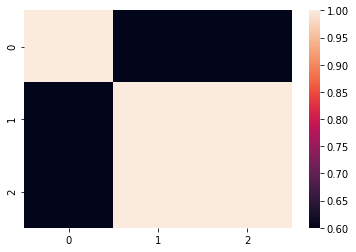

In [37]:
sns.heatmap(corr_matrix)
plt.show()

In [38]:
#viz = Rank2D(['A','B','C'], algorithm='pearson')
#viz.fit(cov_matrix)
#viz.transform(cov_matrix)
#plt.plot(covariance_matrix)  

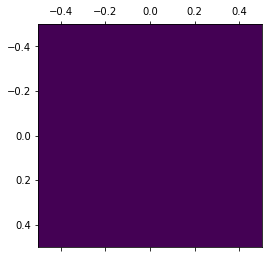

In [39]:
plt.matshow(pd.DataFrame(df).corr())    
plt.show() 

**Links**
- Correlation Analysis: https://statzilla.ru/application_en
- https://numpy.org/doc/1.18/reference/generated/numpy.corrcoef.html
- https://gradehub.com/blog/point-biserial/  
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html
- https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/correlation-coefficient-formula/
<br>StackExchange:<br>
- Pearson vs Spearman --> https://stats.stackexchange.com/questions/11746/what-could-cause-big-differences-in-correlation-coefficient-between-pearsons-an?noredirect=1&lq=1
- Pearson or Spearman? --> https://stats.stackexchange.com/questions/8071/how-to-choose-between-pearson-and-spearman-correlation?noredirect=1&lq=1
- p-value in correclation -- >https://stats.stackexchange.com/questions/131037/what-is-the-deal-with-p-value-when-generating-pearsons-r-correlation-coeffi?answertab=oldest#tab-top
- https://datascience.stackexchange.com/questions/893/how-to-get-correlation-between-two-categorical-variable-and-a-categorical-variab